##### Asigment 4 

Student: Andres Urrego Angel

Course: Computational Applied Statistics

In this final assigment is deployed a building process for two machine learning algorithms in order to measure what of these is the most accurate to predict the numbers within a zip code. In order to execute the flow below is required to supply the **path** and the **file name** to build, deploy and analyze the models prediction. PLease follow the steps and descriptions below:

##### Set the path and file name to read the input data

Provide the information below:

In [73]:

import pandas as pd
import numpy as np

path=  input('type the data file location (path) example: ''data/''') # '/home/andrw/script/repository/McGill/data/'
filename = input('type the file name, example ''ziptrain.csv''') #'ziptrain.csv'
data = path+filename
numbers = np.loadtxt(data)    

##### Execute a PCA projection

Now, it's deployed a PCA function to project the 256 variables in the source data in 4 proincipal components to make the model process faster and easier the input data. Further in the plot trigered is clear how all digits are included in the 4 components.


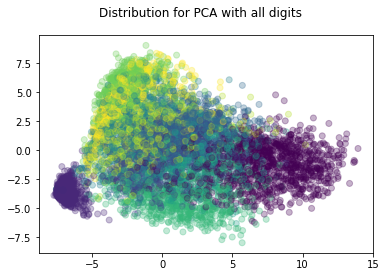

In [74]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

#Project the 256 predictors in 4 variables
pca = PCA(n_components = 4)
pca.fit(numbers[:, 1:])
Z = pca.transform(numbers[:,1:])

plt.suptitle('Distribution for PCA with all digits');
plt.scatter(Z[:,0],Z[:,1],c=numbers[:,0],alpha=0.3);


##### Data readiness

Before deploy the machine learning models is required work on the data readiness to split the dataset  between the test and training sub datasets. Additionally, to better fit the data is used the function `Standard Scaler` to secure the dataset standarization. Finally, on the target variable is required apply a [label encoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to pass in the model the target data as in rather than float and fit seamlessly the `y`

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Fix the target type with label encoded
lab_enc = preprocessing.LabelEncoder()

# Read the target
y = []
for i in numbers: 
    y.append(i[0])
    #print(int(i[0]))
    
y = np.array(y) #switch to array
    
# Split dataset to train (80%) and test(20%) the model with the orginal data source 
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size = 0.2, random_state=1)
ScalerX = StandardScaler().fit(X_train)
Scalery = StandardScaler().fit(y_train.reshape(-1,1))
X_train =  ScalerX.transform(X_train)
y_train = Scalery.transform(y_train.reshape(-1,1))
y_train = lab_enc.fit_transform(y_train.ravel())


# Get ready the tests chunks
X_test = ScalerX.transform(X_test)
y_test = scalery.transform(y_test.reshape(-1,1))
y_test = lab_enc.fit_transform(y_test.ravel())

##### Create a Logistic Regression model

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

#Create linear model for prediction
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Create a Quadratic Discriminant Analysis model

In [81]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

##### Cross Validation

Following a machine learning development best practice, is highly recommended perform a cross validation on each model to measure the how accurate is every model. Therefore, in this project is applied the methodology called **cross validation** with a split of 5 different sub datasets. At the end are printed the scores for each model and is remarkable how the scores are higher for the **Quadratic Discriminant** model.

In [82]:
from sklearn.cross_validation import KFold, cross_val_score

cv= KFold(X_train.shape[0],5,shuffle=True,random_state=33)
scores_lr = cross_val_score(lr,X_train,y_train,cv=cv)
scores_qda = cross_val_score(qda,X_train,y_train,cv=cv)
print('-'*20+' The scores results for the cross validation on logistic regression are: '+'-'*20)
print(scores_lr)
print('-'*20+' The scores results for the cross validation on quadratic discriminant are: '+'-'*20)
print(scores_qda)


-------------------- The scores results for the cross validation on logistic regression are: --------------------
[ 0.6966581   0.70779777  0.68696398  0.69897084  0.70926244]
-------------------- The scores results for the cross validation on quadratic discriminant are: --------------------
[ 0.76863753  0.7832048   0.76072041  0.75471698  0.77701544]


##### Load test data and prepare the validation

As part of the validation process it's required load the dataset called *ziptest.csv*. Therefore, the project will ask for the path and file name to the executor. Once  this information is typed the project will deploy a second PCA model in order to get 4 principal components based on test data as input for validation in the models created previously

In [83]:
path= input('type the test data file location (path) example: ''data/''') #'/home/andrw/script/repository/McGill/data/' 
filename = input('type the test file name, example ''ziptrain.csv''') # 'ziptest.csv'
datatest = path+filename
numberstest = np.loadtxt(data)

pca_test = PCA(n_components = 4)
pca_test.fit(numberstest[:, 1:])
Z_test = pca_test.transform(numberstest[:,1:])

##### Predictions based on test data

Before deploy the models with the test data is required reshape and get ready the test dataset among the target and the predictors. Then is applied a prediction for each model.

In [84]:
# Read the target
y_test_zip = []
for i in numberstest: 
    y_test_zip.append(i[0])
    #print(int(i[0]))
    
y_test_zip = np.array(y_test_zip) #switch to array
y_test_zip = scalery.transform(y_test_zip.reshape(-1,1))
y_test_zip = lab_enc.fit_transform(y_test_zip.ravel())

y_lr_pred = lr.predict(Z_test.reshape(7291,4))
y_qda_pred = qda.predict(Z_test.reshape(7291,4))

##### Verify the accuracy score for each prediction

Finally in order to pick out the most accurate and efficient prediction model that fits with the project needs to predict the zip code digits. It's checked the accuracy score among both models.

In [85]:
from sklearn.metrics import accuracy_score

print('The accuracy for the Logistic Regression is: {0:.3f}'.format(accuracy_score(y_lr_pred,y_test_zip)))
print('The accuracy for the Quadratic Discriminatoin is: {0:.3f}'.format(accuracy_score(y_qda_pred,y_test_zip)))


The accuracy for the Logistic Regression is: 0.585
The accuracy for the Quadratic Discriminatoin is: 0.332


##### Conclusions

Strickingly, the model with a higher score during the [cross validation](#cross-validation) (Quadratic Discriminant Analysis) is the worst performed in a prediction based on data coming from a *ziptest* dataset. Its score is reduce to 33% of accuracy. In the other hand, the model of logistic regression is more powerful. However an accuracy score less than 70% is still down to guarantee a good model performance. 

Likely, in order to enhance the better model among these two. It would be required play around the hyper parameters to fit better the prediction levels.